# Model Selection
In this notebook, we will focus on model selection. We first import all libraries will be using, define some functions and import the dataset we will be using through out the notebook.

In [118]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


%matplotlib inline
pd.plotting.register_matplotlib_converters()

from sklearn.model_selection import train_test_split
from sklearn.cluster import SpectralClustering, KMeans, AgglomerativeClustering, AffinityPropagation
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn import metrics
from yellowbrick.cluster import KElbowVisualizer

sns.set(style = "ticks")

/Users/mus/miniconda3/envs/ds/lib/python3.7/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


Next, we apply the same transformations we have done in Load & Cleanse notebook to get the dataframe ready.

In [5]:
file_path = "../data/data.csv"
data = pd.read_csv(file_path, index_col = "consumer_id")

cols_with_na = [col for col in data.columns if data[col].isnull().any()]

data.drop(cols_with_na, axis = 1, inplace = True)

## Clustering and Labeling

The sample data is not labeled. So, we cannot use supervised classification algorithms. Therefore, we will first label the data using a clustering algorithm and then use a tree-based classification algorithm to train a classification model. This way, we will be able to classify unseen data based on the classification model we have built.


In order to cluster the data points, we will use the DBSCAN algorithm. This algorithm has advantages of some other clustering algorithms such as _k_-means, for example. _k_-means is not robust enough to changes in the data points. In addition, we are required to provide the number of clusters. Although, iterative re-calibration of cluster size _k_ can be achieved, much of the time we will not know what a reasonable _k_ values is the best one. DBSCAN, on the other hand, does not require a specific number of clusters and it robust to changes in the data points.

Lets have a look at the scatter plot pairs of the variables. This will allow us to visualise some cross-sections of the data. Majority of the columns are boolean. So, we will select a subset of columns that would give us better look into the clusters. This will also eliminate plots that do not offer much information for this purpose.

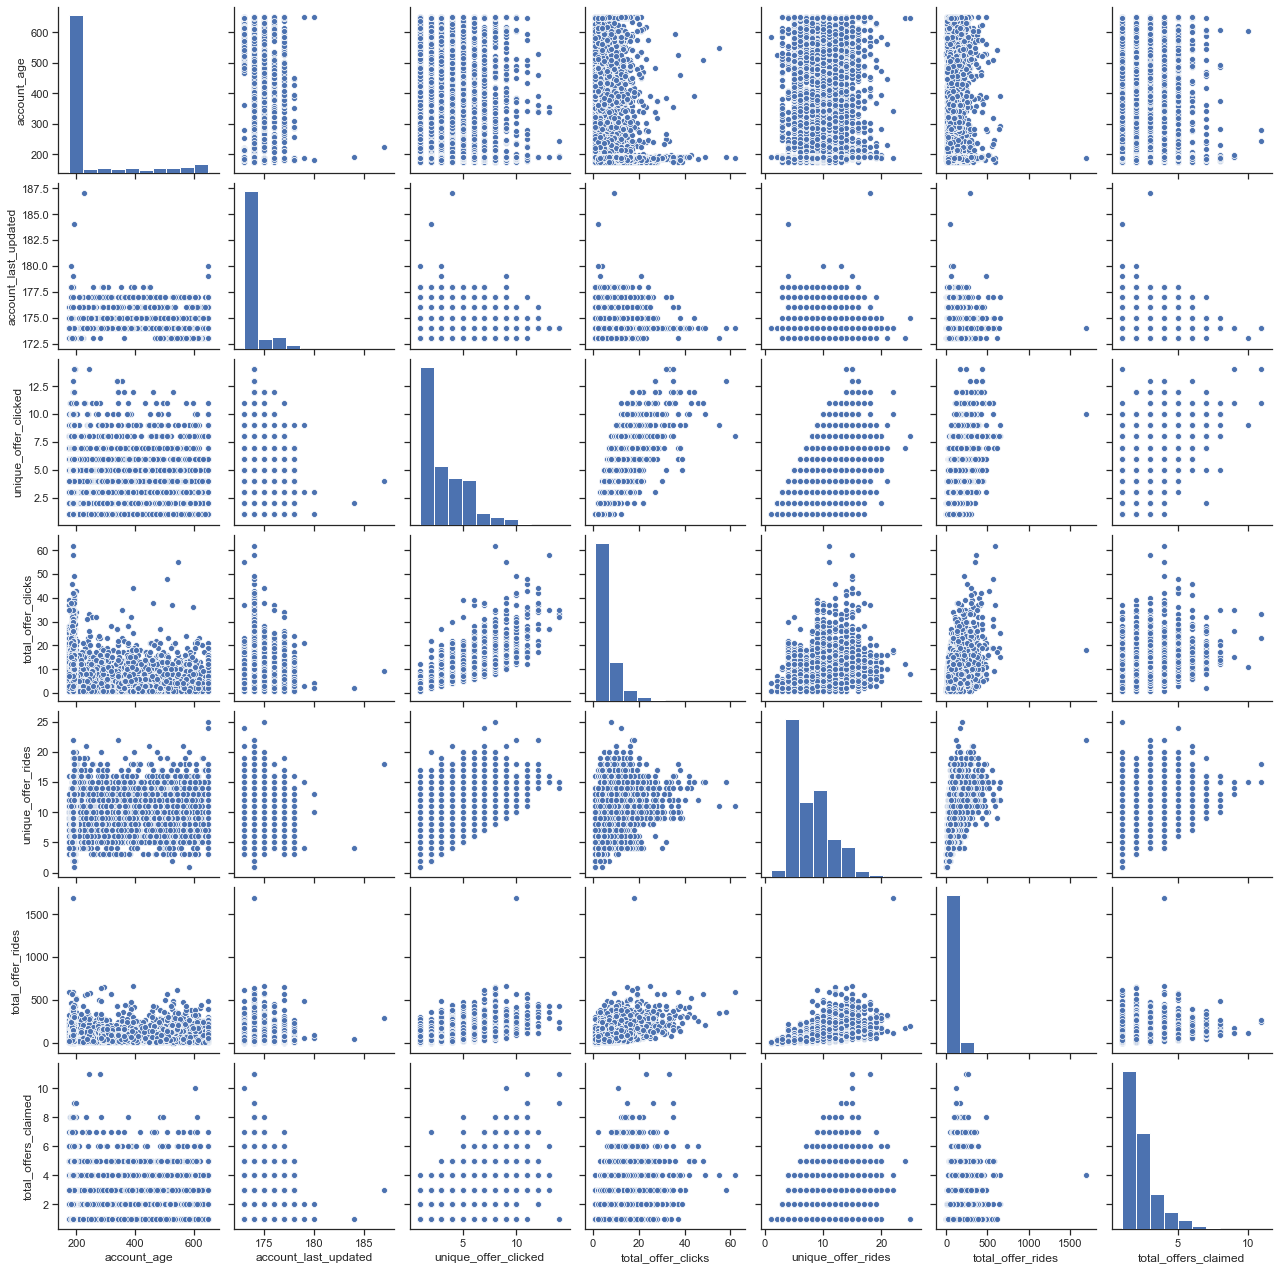

In [90]:
sub_cols = [
    "account_age", 
    "account_last_updated", 
    "unique_offer_clicked", 
    "total_offer_clicks", 
    "unique_offer_rides", 
    "total_offer_rides", 
    "total_offers_claimed"
]

sns.pairplot(data, vars=sub_cols)